<div style="font-family: 'Segoe UI', Arial, sans-serif; line-height:1.7; color:#2c3e50;">

  <!-- Title -->
  <h1 style="text-align:center; color:#1e88e5;">
    🩺 Comprehensive Skin Lesion Classification & Analysis
  </h1>

  <!-- Intro Card -->
  <div style="background:#f5f9ff; border-left:6px solid #1e88e5; padding:16px; border-radius:8px; margin-bottom:20px;">
    <p style="font-size:15px;">
      Welcome to this <b>advanced Skin Lesion Classification Project</b>!  
      This project presents a complete workflow for analyzing, visualizing, and classifying skin lesion images using 
      <span style="color:#1565c0;"><b>state-of-the-art Machine Learning and Deep Learning techniques</b></span>.
    </p>
    <p style="font-size:15px;">
      The primary goal is to assist <b>dermatologists and medical professionals</b> in accurately identifying various skin lesion types,
      improving diagnostic efficiency, and enabling <b>early detection of malignant conditions</b>.
    </p>
  </div>

  <!-- Objectives -->
  <h2 style="color:#2e7d32;">🎯 Project Objectives</h2>
  <ul style="list-style:none; padding-left:0;">
    <li>📊 <b>Comprehensive dataset analysis</b> including class distribution, patient age, gender, and lesion localization.</li>
    <li>🖼️ <b>Image preprocessing & visualization</b> with automatic and informative descriptions.</li>
    <li>🔬 <b>Clinical risk stratification</b> for benign, precancerous, and malignant lesions.</li>
    <li>🤖 <b>High-performance predictive models</b> for multi-class skin lesion classification.</li>
    <li>📈 <b>Professional & interactive visualizations</b> for insight extraction and decision-making.</li>
    <li>💡 <b>End-to-end pipeline</b> from data exploration to medical image classification.</li>
  </ul>

  <!-- Highlights -->
  <h2 style="color:#6a1b9a;"> Key Highlights</h2>

<table style="width:100%; border-spacing:12px;">
  <tr>
    <td style="background:#f3e5f5; padding:14px; border-radius:8px; width:50%;">
      🔹 Thousands of labeled skin lesion images with rich patient metadata.
    </td>
    <td style="background:#e8f5e9; padding:14px; border-radius:8px; width:50%;">
      🔹 Advanced visualizations using <b>Matplotlib</b> & <b>Seaborn</b>.
    </td>
  </tr>

  <tr>
    <td style="background:#e3f2fd; padding:14px; border-radius:8px;">
      🔹 Sample image grids with clear labels and automatic descriptions.
    </td>
    <td style="background:#fff3e0; padding:14px; border-radius:8px;">
      🔹 Robust preprocessing: missing data handling, normalization, and cleaning.
    </td>
  </tr>

  <tr>
    <td style="background:#ede7f6; padding:14px; border-radius:8px;">
      🔹 Strong ML & DL models for accurate multi-class classification.
    </td>
    <td style="background:#fce4ec; padding:14px; border-radius:8px;">
      🔹 Publication-ready plots suitable for research and presentations.
    </td>
  </tr>
</table>

  </div>

  <!-- Footer -->
  <div style="margin-top:25px; text-align:center; font-size:14px; color:#555;">
    🚀 Designed for <b>medical AI research</b>, <b>clinical insight</b>, and <b>real-world impact</b>.
  </div>

</div>

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Import Libraries
</h2>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2025-12-18 10:23:48.396816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766053428.567072      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766053428.619525      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766053429.017361      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766053429.017415      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766053429.017418      24 computation_placer.cc:177] computation placer alr

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Load Metadata
</h2>

In [2]:
DATA_DIR = '/kaggle/input/skin-cancer-mnist-ham10000'
IMAGE_DIR = os.path.join(DATA_DIR, 'HAM10000_images')
META_PATH = os.path.join(DATA_DIR, 'HAM10000_metadata.csv')
df = pd.read_csv(META_PATH)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Comprehensive Data Analysis Wıth Visualızations
</h2>

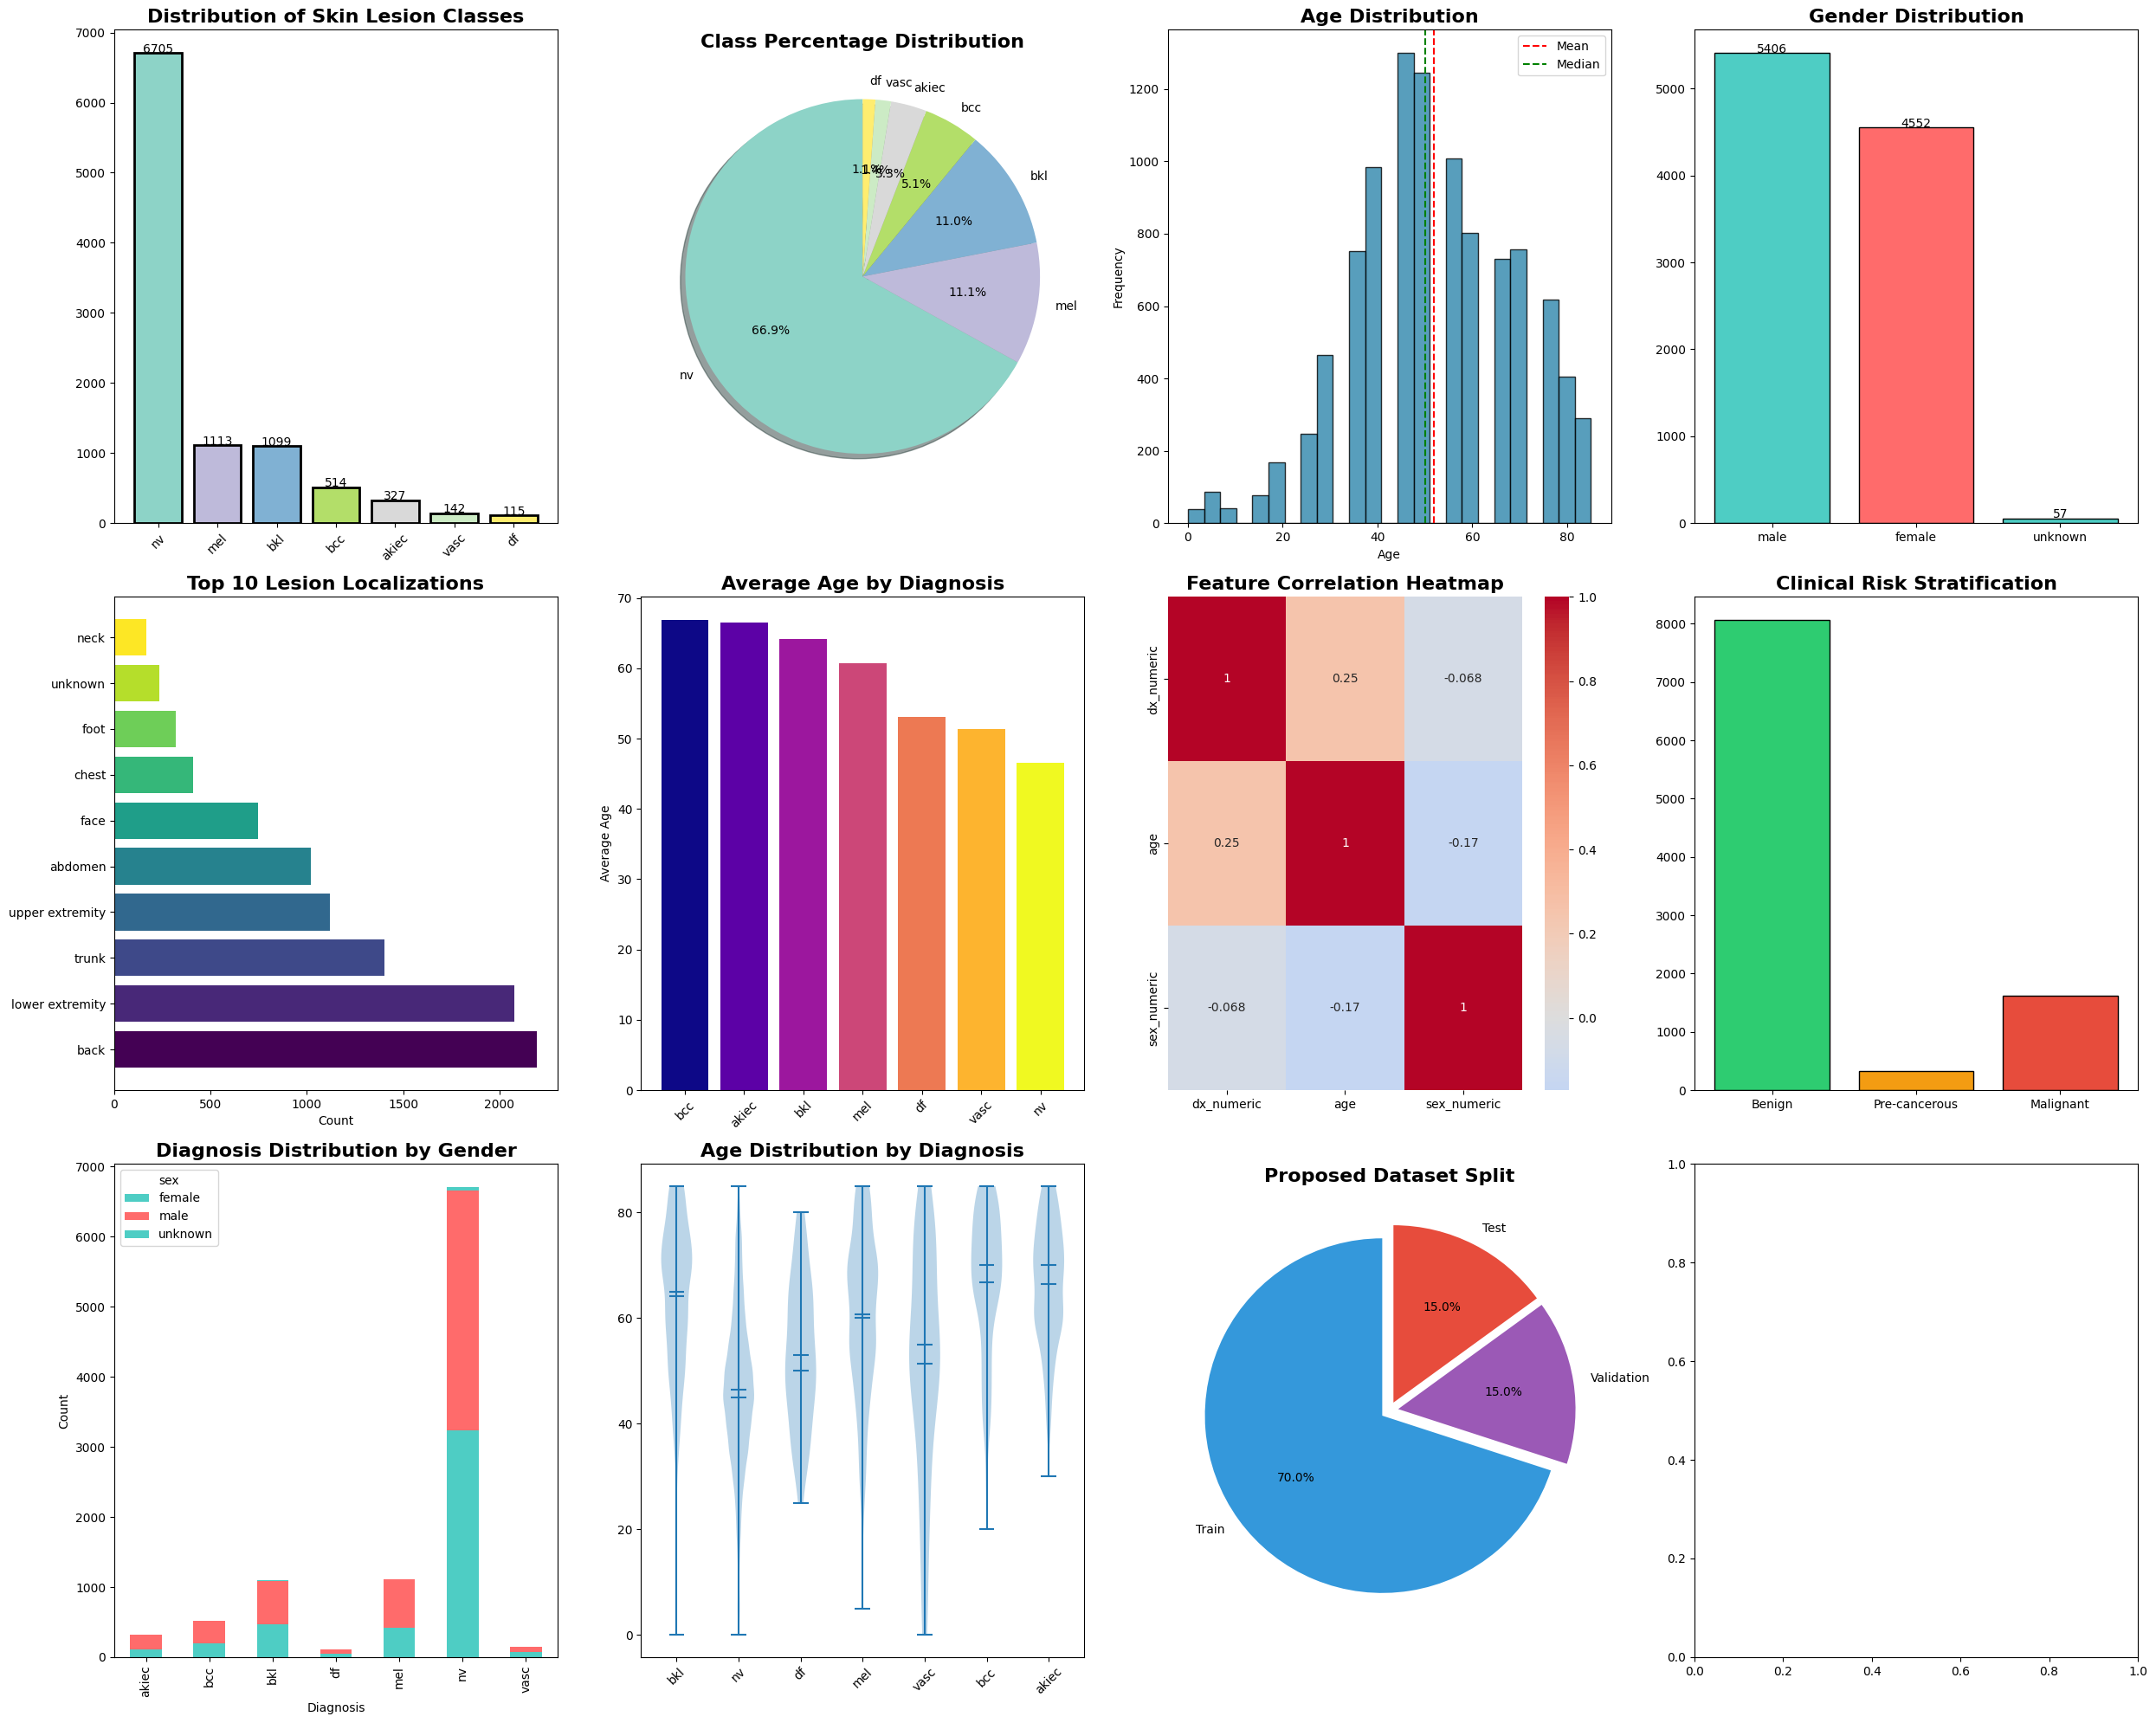

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os


df_metadata = df.copy()  

numeric_cols = ['age']
df_metadata = df_metadata.dropna(subset=['dx'])
df_metadata['age'] = df_metadata['age'].fillna(df_metadata['age'].median())
df_metadata['sex'] = df_metadata['sex'].fillna('unknown')
df_metadata['localization'] = df_metadata['localization'].fillna('unknown')

class_to_num = {cls: idx for idx, cls in enumerate(df_metadata['dx'].unique())}
class_dict = class_to_num.copy()

fig = plt.figure(figsize=(25, 20))

# 1. Class Distribution
plt.subplot(3, 4, 1)
class_counts = df_metadata['dx'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(class_counts)))
bars = plt.bar(range(len(class_counts)), class_counts.values, color=colors, edgecolor='black', linewidth=2)
plt.title('Distribution of Skin Lesion Classes', fontsize=16, fontweight='bold')
plt.xticks(range(len(class_counts)), class_counts.index, rotation=45)
for bar, value in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value}', ha='center')

# 2. Pie Chart
plt.subplot(3, 4, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title('Class Percentage Distribution', fontsize=16, fontweight='bold')

# 3. Age Distribution
plt.subplot(3, 4, 3)
plt.hist(df_metadata['age'], bins=25, color='#2E86AB', edgecolor='black', alpha=0.8)
plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df_metadata['age'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_metadata['age'].median(), color='green', linestyle='--', label='Median')
plt.legend()

# 4. Gender Distribution
plt.subplot(3, 4, 4)
gender_counts = df_metadata['sex'].value_counts()
bars = plt.bar(gender_counts.index, gender_counts.values, color=['#4ECDC4', '#FF6B6B'], edgecolor='black')
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
for bar, value in zip(bars, gender_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value}', ha='center')

# 5. Localization Distribution
plt.subplot(3, 4, 5)
local_counts = df_metadata['localization'].value_counts().head(10)
y_pos = np.arange(len(local_counts))
plt.barh(y_pos, local_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(local_counts))))
plt.yticks(y_pos, local_counts.index)
plt.xlabel('Count')
plt.title('Top 10 Lesion Localizations', fontsize=16, fontweight='bold')

# 6. Average Age by Diagnosis
plt.subplot(3, 4, 6)
age_by_dx = df_metadata.groupby('dx')['age'].mean().sort_values(ascending=False)
plt.bar(range(len(age_by_dx)), age_by_dx.values, color=plt.cm.plasma(np.linspace(0, 1, len(age_by_dx))))
plt.title('Average Age by Diagnosis', fontsize=16, fontweight='bold')
plt.xticks(range(len(age_by_dx)), age_by_dx.index, rotation=45)
plt.ylabel('Average Age')

# 7. Heatmap of Feature Correlation
plt.subplot(3, 4, 7)
numeric_df = df_metadata.copy()
numeric_df['dx_numeric'] = numeric_df['dx'].map(class_to_num)
numeric_df['sex_numeric'] = numeric_df['sex'].map({'male':0, 'female':1})
corr_matrix = numeric_df[['dx_numeric','age','sex_numeric']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')

# 8. Risk Stratification
plt.subplot(3, 4, 8)
risk_categories = ['Benign', 'Pre-cancerous', 'Malignant']
benign_cases = len(df_metadata[df_metadata['dx'].isin(['nv','bkl','df','vasc'])])
precancerous_cases = len(df_metadata[df_metadata['dx']=='akiec'])
malignant_cases = len(df_metadata[df_metadata['dx'].isin(['bcc','mel'])])
risk_counts = [benign_cases, precancerous_cases, malignant_cases]
plt.bar(risk_categories, risk_counts, color=['#2ECC71','#F39C12','#E74C3C'], edgecolor='black')
plt.title('Clinical Risk Stratification', fontsize=16, fontweight='bold')

# 9. Stacked Bar: Gender vs Diagnosis
plt.subplot(3, 4, 9)
pivot_table = pd.crosstab(df_metadata['dx'], df_metadata['sex'])
pivot_table.plot(kind='bar', stacked=True, color=['#4ECDC4','#FF6B6B'], ax=plt.gca())
plt.title('Diagnosis Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# 10. Violin Plot of Age by Diagnosis
plt.subplot(3, 4, 10)
data_for_violin = [df_metadata[df_metadata['dx']==cls]['age'].values for cls in df_metadata['dx'].unique()]
plt.violinplot(data_for_violin, showmeans=True, showmedians=True)
plt.title('Age Distribution by Diagnosis', fontsize=16, fontweight='bold')
plt.xticks(range(1,len(df_metadata['dx'].unique())+1), df_metadata['dx'].unique(), rotation=45)

# 11. Dataset Split Visualization
plt.subplot(3, 4, 11)
sizes = [70,15,15]
labels = ['Train','Validation','Test']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#3498DB','#9B59B6','#E74C3C'], startangle=90, explode=[0.05,0.05,0.05])
plt.title('Proposed Dataset Split', fontsize=16, fontweight='bold')

# 12. Sample Images Grid with Auto Descriptions
plt.subplot(3, 4, 12)
sample_imgs = []
for idx, row in df_metadata.sample(4).iterrows():
    img_path = os.path.join('HAM10000_images', row['image_id']+'.jpg')
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        sample_imgs.append((img, row['dx']))

for i, (img, label) in enumerate(sample_imgs):
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Sample Lesion\nClass: {label}', fontsize=12)

plt.tight_layout()
plt.show()

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Image Loading & Preprocessing 
</h2>

In [4]:
IMG_SIZE = 128

images = []
labels = []

# Image folders
image_dirs = [
    '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1',
    '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'
]

image_path_dict = {}

for img_dir in image_dirs:
    for img_name in os.listdir(img_dir):
        image_path_dict[img_name.split('.')[0]] = os.path.join(img_dir, img_name)

for _, row in df.iterrows():
    img_id = row['image_id']
    img_path = image_path_dict.get(img_id)

    if img_path is None:
        continue

    img = cv2.imread(img_path)

    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    images.append(img)
    labels.append(row['dx'])

images = np.array(images, dtype='float32') / 255.0
labels = np.array(labels)

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
    Label Encoding
</h2>

In [5]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

le.classes_

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype='<U5')

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Train / Test Split
</h2>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    images,
    labels_encoded,
    test_size=0.2,
    random_state=42,
    stratify=labels_encoded
)

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  CNN Model Architecture
</h2>

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1766053603.836361      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,518,727 (24.87 MB)

 Trainable params: 6,518,279 (24.87 MB)

 Non-trainable params: 448 (1.75 KB)

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Model Training
</h2>

In [8]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=25,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/25


I0000 00:00:1766053610.888527      71 service.cc:152] XLA service 0x7fc00c002280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766053610.888582      71 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1766053611.372205      71 cuda_dnn.cc:529] Loaded cuDNN version 91002


 13/226 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5077 - loss: 2.5141

I0000 00:00:1766053615.293488      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


226/226 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.6344 - loss: 1.5162 - val_accuracy: 0.0162 - val_loss: 6.3137
Epoch 2/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7047 - loss: 0.8038 - val_accuracy: 0.5910 - val_loss: 1.9332
Epoch 3/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7210 - loss: 0.7693 - val_accuracy: 0.7219 - val_loss: 0.7531
Epoch 4/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7457 - loss: 0.6662 - val_accuracy: 0.7594 - val_loss: 0.6883
Epoch 5/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7688 - loss: 0.6238 - val_accuracy: 0.7531 - val_loss: 0.6917
Epoch 6/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7879 - loss: 0.5618 - val_accuracy: 0.7768 - val_loss: 0.6674
Epoch 7/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8082 - loss: 0.5025 - val_accuracy: 0.7668 - val_loss: 0.7145
Epoch 8/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8284 - loss: 0.4585 - val_accuracy: 0.75

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Accuracy Curve
</h2>

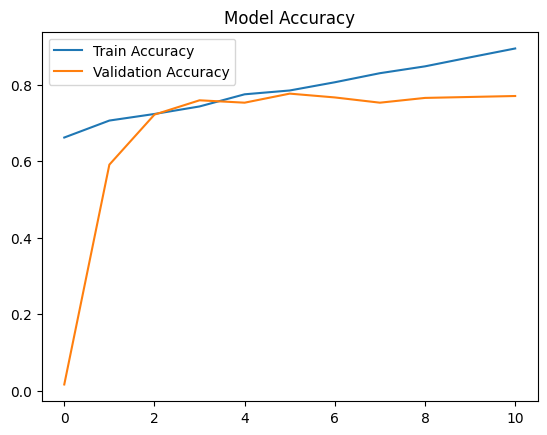

In [9]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Loss Curve
</h2>

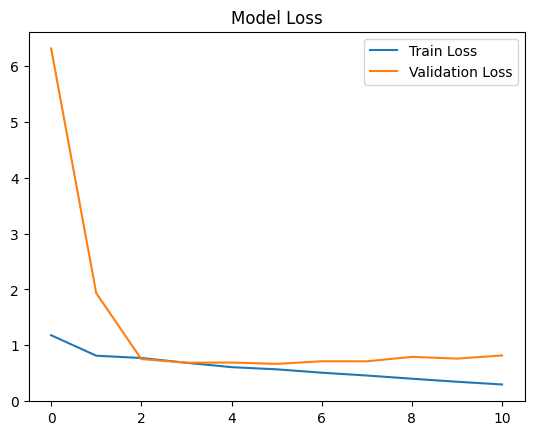

In [10]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Model Evaluation
</h2>

In [11]:
y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_
))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

       akiec       0.55      0.48      0.51        65
         bcc       0.54      0.50      0.52       103
         bkl       0.52      0.41      0.46       220
          df       0.36      0.17      0.24        23
         mel       0.46      0.41      0.43       223
          nv       0.85      0.92      0.88      1341
        vasc       0.58      0.54      0.56        28

    accuracy                           0.76      2003
   macro avg       0.55      0.49      0.51      2003
weighted avg       0.74      0.76      0.74      2003



<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Confusion Matrix
</h2>

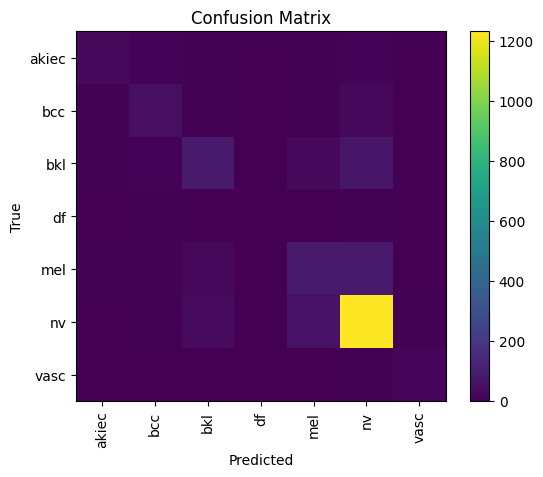

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_, rotation=90)
plt.yticks(range(len(le.classes_)), le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Function
</h2>

In [13]:
def draw_circle_prediction(image, label):
    img = image.copy()
    h, w, _ = img.shape
    center = (w // 2, h // 2)
    radius = min(center) - 10

    cv2.circle(img, center, radius, (255, 0, 0), 3)

    plt.figure()
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Show Sample Predictions
</h2>

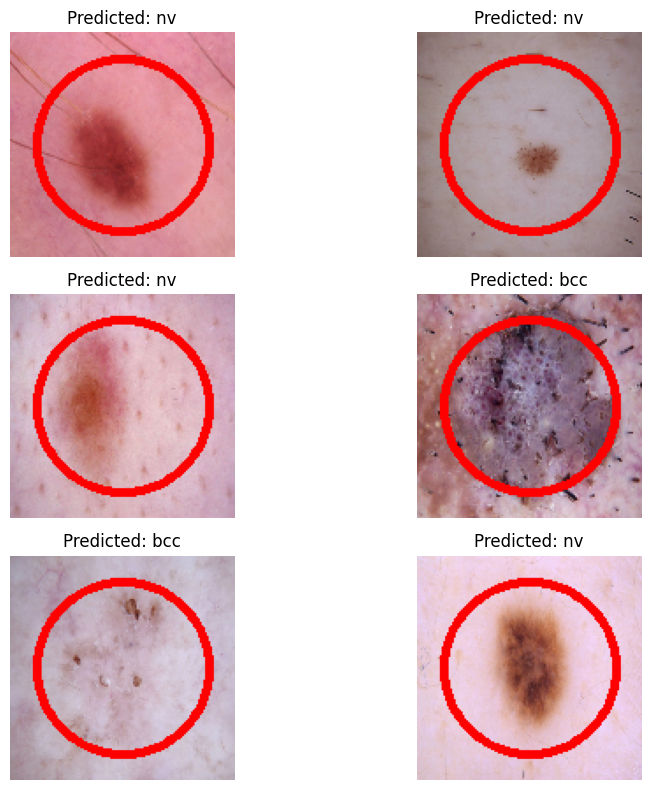

In [14]:
num_samples = 6 

plt.figure(figsize=(10, 8))

for i in range(num_samples):
    idx = np.random.randint(0, len(X_test))
    img = (X_test[idx] * 255).astype(np.uint8)
    pred_label = le.classes_[y_pred[idx]]

    img_copy = img.copy()
    h, w, _ = img_copy.shape
    center = (w // 2, h // 2)
    radius = min(center) - 15
    cv2.circle(img_copy, center, radius, (255, 0, 0), 3)

    plt.subplot(num_samples // 2, 2, i + 1)
    plt.imshow(img_copy)
    plt.title(f'Predicted: {pred_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<h2 style="
  text-align:center;
  color:#0d47a1;
  font-weight:700;
  font-size:33px;
  text-shadow: 2px 2px 6px rgba(0,0,0,0.25);
">
  Interactive Skin Lesion Gallery with Enhanced Images & Professional Explanations

</h2>


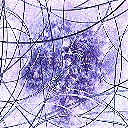
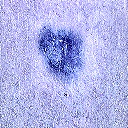
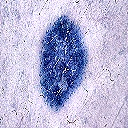
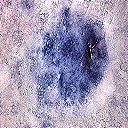
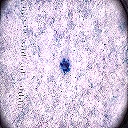
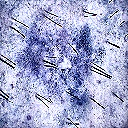
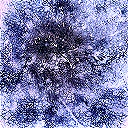
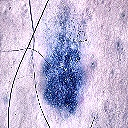
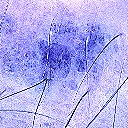

In [15]:
from IPython.display import display, HTML
import base64
import cv2
import numpy as np

def image_to_base64(img):
    _, buffer = cv2.imencode('.jpg', img)
    return base64.b64encode(buffer).decode()

def enhance_image(img):
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    enhanced = cv2.merge((cl,a,b))
    enhanced = cv2.cvtColor(enhanced, cv2.COLOR_LAB2RGB)

    kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    sharp = cv2.filter2D(enhanced, -1, kernel)

    return sharp

descriptions = {
    'mel': "Malignant Melanoma detected. This is a high-risk skin cancer that may spread rapidly. Early diagnosis significantly improves survival rates.",
    'bcc': "Basal Cell Carcinoma predicted. A common form of skin cancer with moderate clinical risk and high treatability.",
    'akiec': "Actinic Keratosis identified. A pre-cancerous lesion caused by long-term sun exposure and requires monitoring.",
    'bkl': "Benign Keratosis detected. A non-cancerous skin lesion with no immediate medical concern.",
    'nv': "Melanocytic Nevus (mole). This is a benign lesion and generally considered low risk.",
    'df': "Dermatofibroma detected. A benign fibrous skin lesion that is clinically harmless.",
    'vasc': "Vascular lesion identified. A benign abnormality related to blood vessels."
}

html = """
<style>
.gallery {
    display: grid;
    grid-template-columns: repeat(3, 1fr);
    gap: 24px;
    font-family: Arial, sans-serif;
}
.card {
    border-radius: 14px;
    padding: 14px;
    background: #ffffff;
    box-shadow: 0 8px 20px rgba(0,0,0,0.12);
}
.card img {
    width: 100%;
    border-radius: 12px;
    border: 3px solid rgba(255,0,0,0.35);
}
.title {
    font-weight: bold;
    margin-top: 10px;
    font-size: 15px;
}
.desc {
    font-size: 13px;
    color: #333;
    margin-top: 6px;
    line-height: 1.4;
}
</style>
<div class="gallery">
"""

num_images = 9

for _ in range(num_images):
    idx = np.random.randint(0, len(X_test))
    img = (X_test[idx] * 255).astype(np.uint8)
    pred_label = le.classes_[y_pred[idx]]

    img = enhance_image(img)
    img_base64 = image_to_base64(img)

    html += f"""
    <div class="card">
        <img src="data:image/jpeg;base64,{img_base64}">
        <div class="title">Predicted Class: {pred_label}</div>
        <div class="desc">{descriptions[pred_label]}</div>
    </div>
    """

html += "</div>"

display(HTML(html))